In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [3]:
titanic = pd.read_csv("/Users/aytackolukisa/Desktop/Jupiter_Dosyaları/Sınıflandırma/titanic/train.csv")
titanic_copy = titanic.copy()

titanic_int_64_df = titanic_copy.select_dtypes(include = ["int64"]).copy()

titanic_float64_df = titanic_copy.select_dtypes(include = ["float64"]).copy()

titanic_object_df = titanic_copy.select_dtypes(include = ["object"]).copy()

titanic_numaric = pd.concat([titanic_int_64_df,titanic_float64_df], axis =1)

In [5]:
titanic_object_df["Cabin"].fillna(method='ffill',inplace = True)
titanic_object_df["Cabin"].fillna(method='bfill',inplace = True)
titanic_object_df["Embarked"].fillna("C",inplace = True)
titanic_object_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      891 non-null    object
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     891 non-null    object
 4   Embarked  891 non-null    object
dtypes: object(5)
memory usage: 34.9+ KB


In [6]:
titanic_object_df.isnull().sum()*100/len(titanic_object_df)

Name        0.0
Sex         0.0
Ticket      0.0
Cabin       0.0
Embarked    0.0
dtype: float64

In [7]:
derece_listesi = titanic_copy.Age
for i in range (len(titanic_copy)):
    if pd.isnull(derece_listesi[i]):
        if titanic_copy["Pclass"][i]==2 and titanic_copy["SibSp"][i] ==0:
            titanic_copy["Age"][i] = titanic_copy.groupby("Pclass")["Age"].median().values[0]
        elif titanic_copy["Pclass"][i]==1 and titanic_copy["SibSp"][i] ==1 :
            titanic_copy["Age"][i] = titanic_copy.groupby("Pclass")["Age"].median().values[0]
        else :
            titanic_copy["Age"][i] = titanic_copy.groupby("Pclass")["Age"].median().values[2]

<ipython-input-7-51edc3a77ec3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_copy["Age"][i] = titanic_copy.groupby("Pclass")["Age"].median().values[2]
<ipython-input-7-51edc3a77ec3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_copy["Age"][i] = titanic_copy.groupby("Pclass")["Age"].median().values[0]
<ipython-input-7-51edc3a77ec3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_copy["Age"][i] = titanic_co

In [8]:
titanic_copy["Cabin"] = titanic_object_df["Cabin"]
titanic_copy["Embarked"] = titanic_object_df["Cabin"]

### WINSORIZE

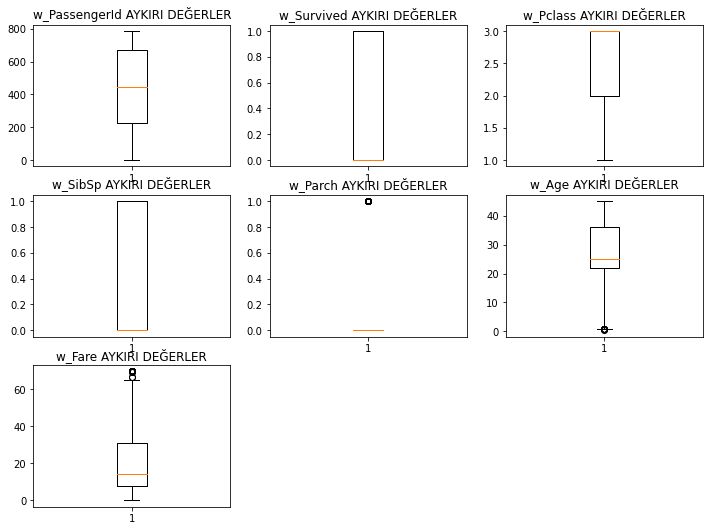

In [10]:
liste_g = titanic_numaric.columns
liste_g = list(liste_g)

from scipy.stats.mstats import winsorize
winsorize_list =["w_"+liste_g[i] for i in range(len(liste_g))] 
for i in range(len(winsorize_list)):
    titanic_copy[ winsorize_list[i]] = winsorize(titanic_copy[liste_g[i]],(0.0,0.12))

plt.figure(figsize = (12,12))
for i in range(len(liste_g)):
    plt.subplot(4,3,i+1)
    plt.boxplot(titanic_copy[winsorize_list[i]])
    plt.title ("{} AYKIRI DEĞERLER".format(winsorize_list[i]))

In [11]:
log_list =["log_"+liste_g[i] for i in range(len(liste_g))]
for i in range(len(log_list)):
    titanic_copy[ log_list[i]] = np.log(titanic_copy[liste_g[i]]+1)
    
titanic_copy.drop(["log_SibSp","log_Parch","log_Survived","log_PassengerId"],axis = 1, inplace =True)
d_list =['Pclass', 'Age', 'Fare']
log_list =['log_Pclass', 'log_Age', 'log_Fare']

In [13]:
titanic_copy_int_64_df = titanic_copy.select_dtypes(include = ["int64"]).copy()

titanic_copy_float64_df = titanic_copy.select_dtypes(include = ["float64"]).copy()

titanic_numaric_son = pd.concat([titanic_int_64_df,titanic_float64_df], axis =1)

titanic_numaric_son["Survived"] = titanic_copy["Survived"]

titanic_copy["kadın"] = titanic_copy.Sex.replace({'female':1, "male":0})


titanic_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,w_Survived,w_Pclass,w_SibSp,w_Parch,w_Age,w_Fare,log_Pclass,log_Age,log_Fare,kadın
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,3,1,0,22.0,7.250,1.386294,3.135494,2.110213,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,1,1,0,38.0,69.550,0.693147,3.663562,4.280593,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,3,0,0,26.0,7.925,1.386294,3.295837,2.188856,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,1,1,0,35.0,53.100,0.693147,3.583519,3.990834,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,3,0,0,35.0,8.050,1.386294,3.583519,2.202765,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,2,0,0,27.0,13.000,1.098612,3.332205,2.639057,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,1,1,0,0,19.0,30.000,0.693147,2.995732,3.433987,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,...,0,3,1,1,24.0,23.450,1.386294,3.218876,3.196630,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,1,1,0,0,26.0,30.000,0.693147,3.295837,3.433987,0


In [14]:
titanic_copy.drop(["Name","Sex","Ticket","Cabin","w_Survived"],axis = 1, inplace = True)
titanic_copy.Embarked = titanic.Embarked
titanic_copy.Embarked.value_counts()
titanic_copy["Embarked"] = titanic_copy.Embarked.replace({'Q':2, 'S':1, "C":0})
titanic_copy.dropna(inplace=True)
titanic_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    889 non-null    int64  
 1   Survived       889 non-null    int64  
 2   Pclass         889 non-null    int64  
 3   Age            889 non-null    float64
 4   SibSp          889 non-null    int64  
 5   Parch          889 non-null    int64  
 6   Fare           889 non-null    float64
 7   Embarked       889 non-null    float64
 8   w_PassengerId  889 non-null    int64  
 9   w_Pclass       889 non-null    int64  
 10  w_SibSp        889 non-null    int64  
 11  w_Parch        889 non-null    int64  
 12  w_Age          889 non-null    float64
 13  w_Fare         889 non-null    float64
 14  log_Pclass     889 non-null    float64
 15  log_Age        889 non-null    float64
 16  log_Fare       889 non-null    float64
 17  kadın          889 non-null    int64  
dtypes: float64

In [16]:
titanic_copy.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,w_PassengerId,w_Pclass,w_SibSp,w_Parch,w_Age,w_Fare,log_Pclass,log_Age,log_Fare,kadın
0,1,0,3,22.0,1,0,7.2500,1.0,1,3,1,0,22.0,7.250,1.386294,3.135494,2.110213,0
1,2,1,1,38.0,1,0,71.2833,0.0,2,1,1,0,38.0,69.550,0.693147,3.663562,4.280593,1
2,3,1,3,26.0,0,0,7.9250,1.0,3,3,0,0,26.0,7.925,1.386294,3.295837,2.188856,1
3,4,1,1,35.0,1,0,53.1000,1.0,4,1,1,0,35.0,53.100,0.693147,3.583519,3.990834,1
4,5,0,3,35.0,0,0,8.0500,1.0,5,3,0,0,35.0,8.050,1.386294,3.583519,2.202765,0


# KNN 

In [33]:
X = titanic_copy.drop('Survived', axis=1)
y = titanic_copy.Survived

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)

knn.score(X_test, y_test)

0.5730337078651685

In [23]:
# ÇAPRAZ DOĞRULAMA

from sklearn.model_selection import cross_val_score
cvscores_3 = cross_val_score(knn, X_test, y_test, cv=3)
print('cv =  3 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(knn, X_test, y_test, cv=10)
print('cv = 10 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_10))

cv =  3 ---> Ortalama çarpraz doğrulama skoru :  0.5453860640301318
cv = 10 ---> Ortalama çarpraz doğrulama skoru :  0.5624183006535948


## KNN İNCE AYAR

### ÖLÇEKLENDİRME

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_olcekli = ss.fit_transform(X)

In [25]:
X_train_olcekli, X_test_olcekli, y_train, y_test = train_test_split(X_olcekli, y, test_size=0.2, random_state = 40)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_olcekli,y_train)
knn.score(X_test_olcekli, y_test)

0.7078651685393258

### AĞIRLIKLANDIRMA

In [28]:
knn = KNeighborsClassifier(n_neighbors = 1, weights ="distance")
knn.fit(X_train,y_train)

knn.score(X_test, y_test)

0.5730337078651685

### K DEĞERİNİN BELİRLENMESİ


In [29]:
komsu_sayisi = np.arange(1, 9)
egitim_kumesi_skoru = np.empty(len(komsu_sayisi))
test_kumesi_skoru = np.empty(len(komsu_sayisi))

In [30]:
for i, k in enumerate(komsu_sayisi):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    egitim_kumesi_skoru[i] = knn.score(X_train, y_train)

    #TEST VERİSİNİN BAŞARISININ HEASAPLANMAS
    test_kumesi_skoru[i] = knn.score(X_test, y_test)

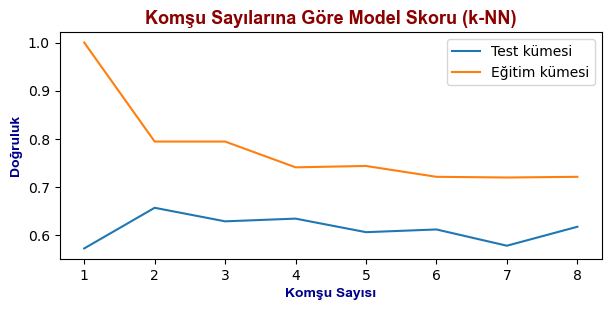

In [32]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }


plt.figure(figsize=(7,3), dpi = 100)
plt.plot(komsu_sayisi, test_kumesi_skoru, label = 'Test kümesi')
plt.plot(komsu_sayisi, egitim_kumesi_skoru, label = 'Eğitim kümesi')
plt.legend()
plt.title('Komşu Sayılarına Göre Model Skoru (k-NN)', fontdict= baslik_font)
plt.xlabel('Komşu Sayısı', fontdict= eksen_font)
plt.ylabel('Doğruluk', fontdict= eksen_font)
plt.show()

# KARAR AĞACI

In [40]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)


In [48]:
titanic_karar_agaci = DecisionTreeClassifier(criterion='entropy', max_features=1,
                                     max_depth=4,random_state = 100)
titanic_karar_agaci.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=1,
                       random_state=100)

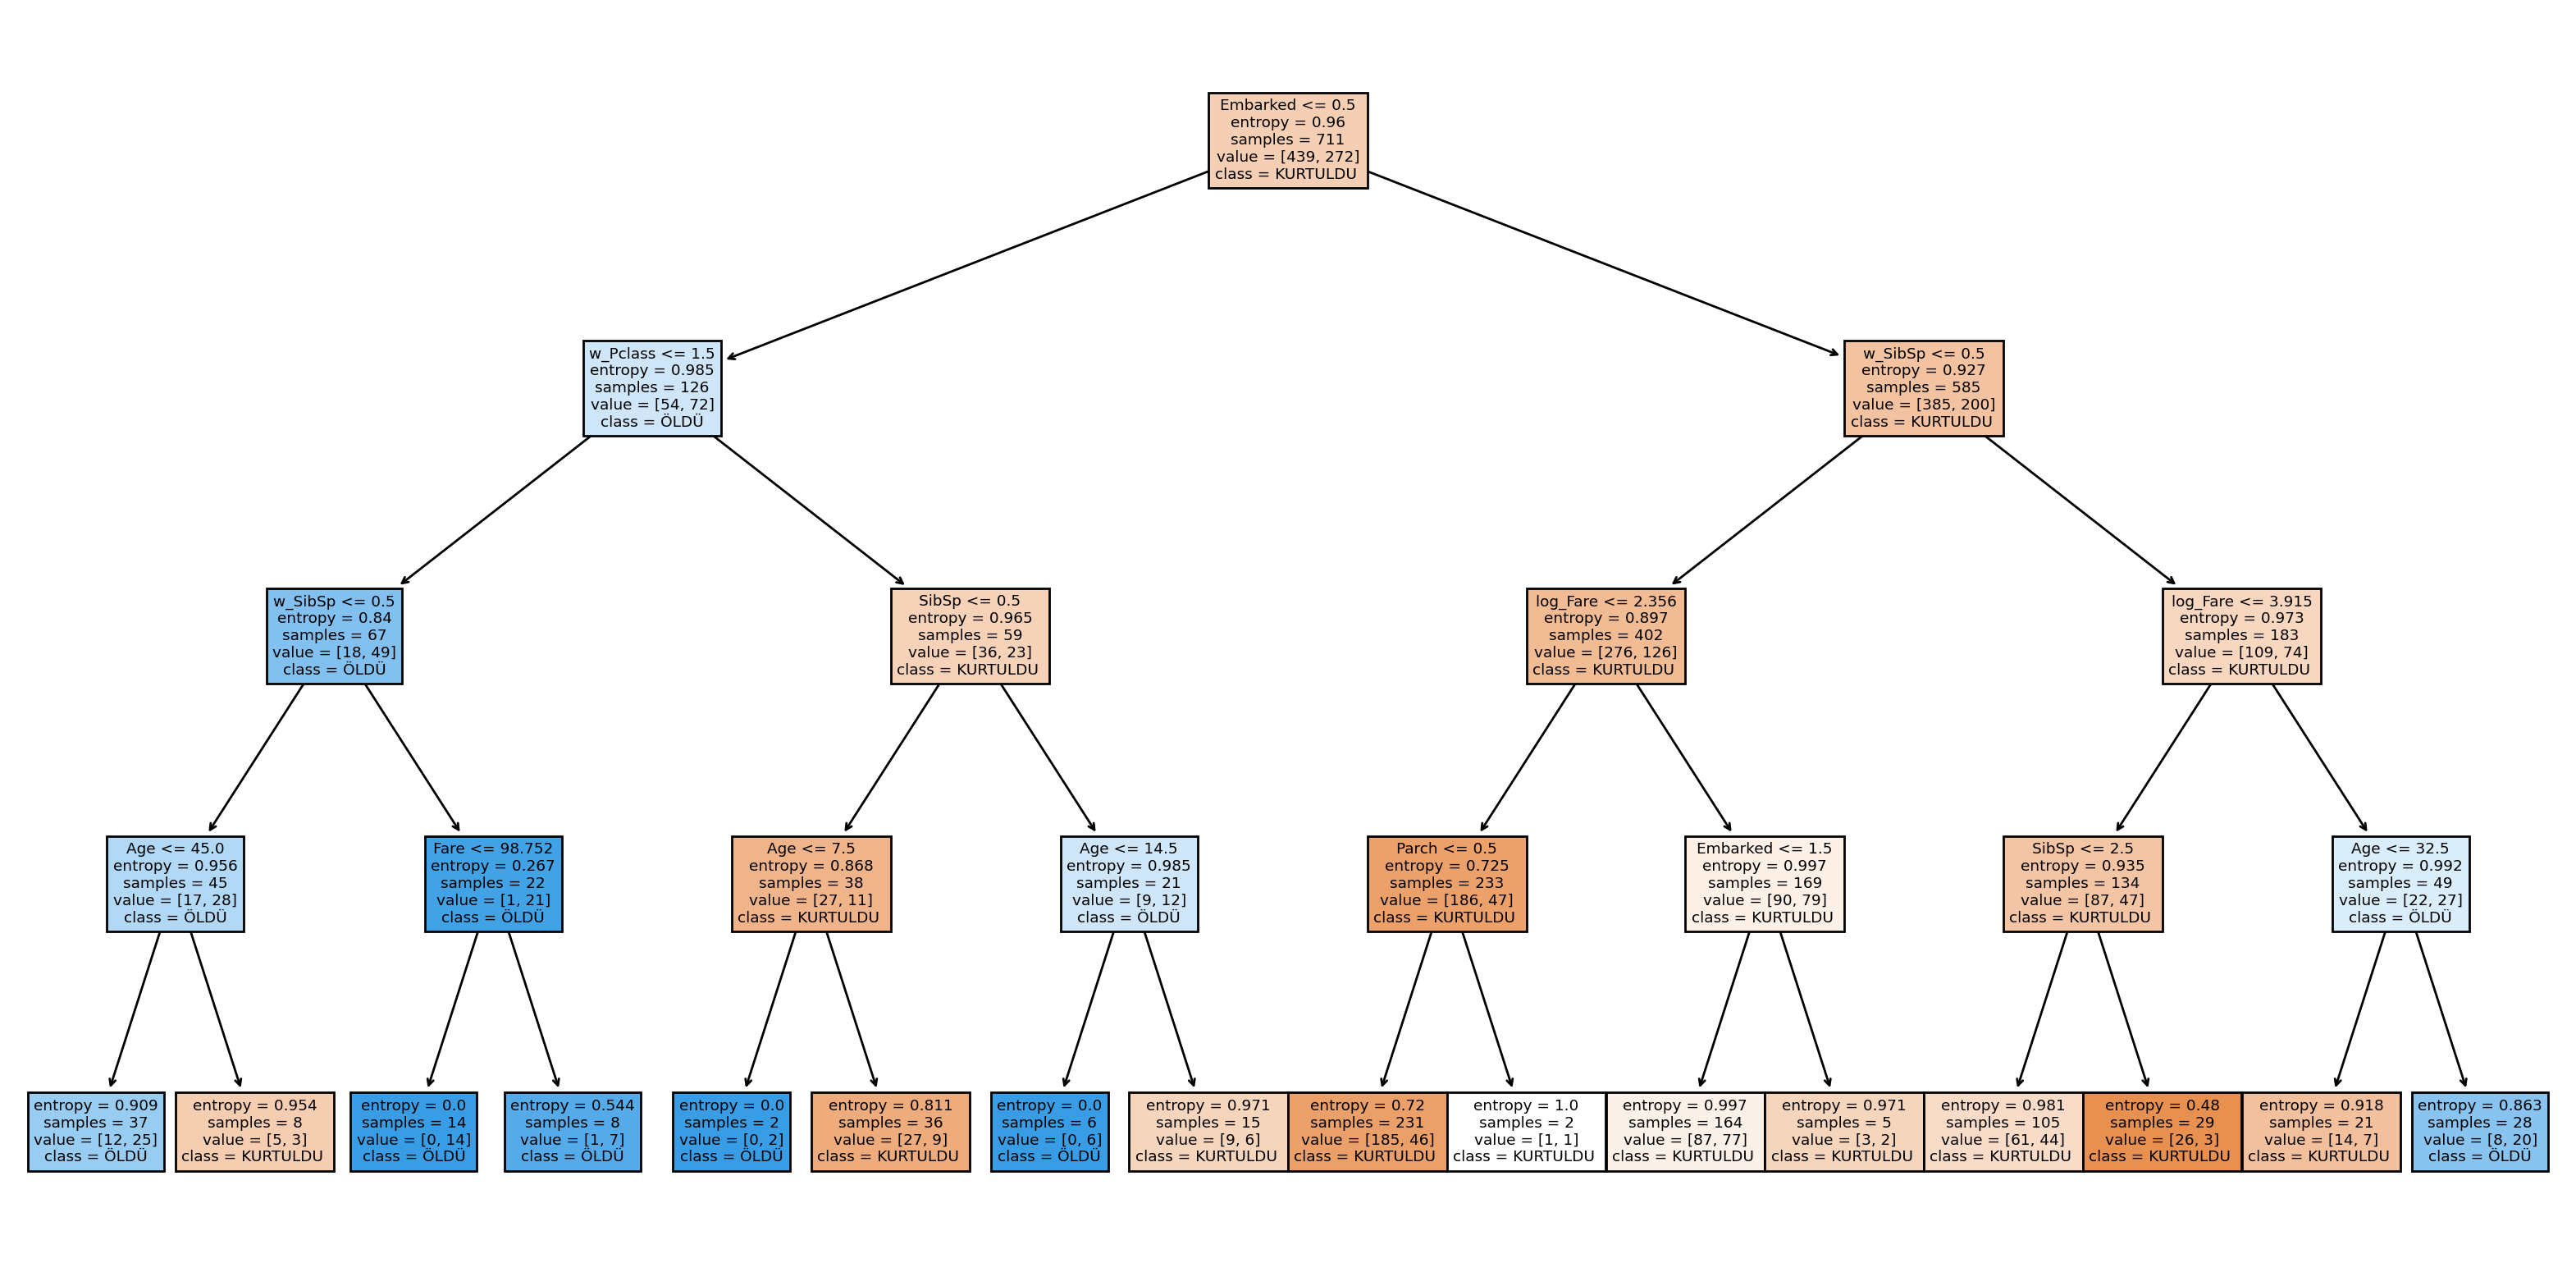

In [49]:
karar_agaci = DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)

X = X_train
y = y_train

karar_agaci.fit(X, y)

from sklearn import tree
plt.figure(figsize=(20, 10), dpi=200)
tree.plot_tree(decision_tree = karar_agaci,
               feature_names=X.columns,
               class_names=['KURTULDU ', 'ÖLDÜ'],
               filled = True
              )
plt.show()

In [50]:
from sklearn.metrics import accuracy_score
y_tahmin_ka = titanic_karar_agaci.predict(X_test)


print("Karar Ağacı Doğruluk Değeri        : {:.2f}".format(accuracy_score(y_test, y_tahmin_ka)))

Karar Ağacı Doğruluk Değeri        : 0.67
